Leitura dos dados no documento excel `Acoustic_Extinguisher_Fire_Dataset.xlsx`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('./Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


Detecção e remoção dos outliers no atributo **`AIRFLOW`** pela distribuição dos dados.

In [2]:
desvp = df['AIRFLOW'].std()
media = df['AIRFLOW'].mean()

print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo std
df_out_airflow = df[(df['AIRFLOW'] < media-(desvp*2)) | (df['AIRFLOW'] > media+(desvp*2))]
print("Outliers:", len(df_out_airflow))

# apenas inliers segundo std
df_in_airflow = df[(df['AIRFLOW'] >= media-(desvp*2)) & (df['AIRFLOW'] <= media+(desvp*2))]
print("Inliers:", len(df_in_airflow))

#removendo outliers
df = df_in_airflow

media = 6.98, desvio padrao = 4.74
Outliers: 34
Inliers: 17408


Detecção e remoção dos outliers no atributo **`DESIBEL`** pela distribuição dos dados.

In [3]:
desvp = df['DESIBEL'].std()
media = df['DESIBEL'].mean()

print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo std
df_out_desibel = df[(df['DESIBEL'] < media-(desvp*2)) | (df['DESIBEL'] > media+(desvp*2))]
print("Outliers:", len(df_out_desibel))

# apenas inliers segundo std
df_in_desibel = df[(df['DESIBEL'] >= media-(desvp*2)) & (df['DESIBEL'] <= media+(desvp*2))]
print("Inliers:", len(df_in_desibel))

#removendo outliers
df = df_in_desibel

media = 96.35, desvio padrao = 8.15
Outliers: 595
Inliers: 16813


Verificação de dados faltando em todas as colunas.

In [4]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Verficação de dados nulos em todas as colunas

In [5]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Dados após o tratamento de outliers.

In [6]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17434,7,lpg,190,91,1.9,8,0
17435,7,lpg,190,91,1.6,7,0
17436,7,lpg,190,87,2.5,6,0
17437,7,lpg,190,86,2.2,5,0


Convertemos os atributos categóricos **FUEL** em numéricos usando a técnica one-hot encoding através do método `get_dummies` no `pandas`.

Como resultado, os quatro tipos de combustíveis presentes (`gasoline`, `kerosene`, `lpg` e `thinner`) foram separados em 4 atributos com valores 0 ou 1.

In [7]:
dummy_vars = pd.get_dummies(df['FUEL'])
df_dummies = pd.concat([dummy_vars, df.drop('FUEL', axis=1)], axis = 1, sort=False)
df_dummies

,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,0,0,1,10,96,0.0,75,0
1,1,0,0,0,1,10,96,0.0,72,1
2,1,0,0,0,1,10,96,2.6,70,1
3,1,0,0,0,1,10,96,3.2,68,1
4,1,0,0,0,1,10,109,4.5,67,1
...,...,...,...,...,...,...,...,...,...,...
17434,0,0,1,0,7,190,91,1.9,8,0
17435,0,0,1,0,7,190,91,1.6,7,0
17436,0,0,1,0,7,190,87,2.5,6,0
17437,0,0,1,0,7,190,86,2.2,5,0


Normalização dos dados.

In [8]:
print("Normalização Min-Max [0,1]")
for column in df_dummies:
    df_dummies[column] = (df_dummies[column] - df_dummies[column].min()) / (df_dummies[column].max()-df_dummies[column].min())
df_dummies

Normalização Min-Max [0,1]


,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,1.000000,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,0.959459,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.159509,0.932432,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.196319,0.905405,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.276074,0.891892,1.0
...,...,...,...,...,...,...,...,...,...,...
17434,0.0,0.0,1.0,0.0,1.0,1.0,0.300000,0.116564,0.094595,0.0
17435,0.0,0.0,1.0,0.0,1.0,1.0,0.300000,0.098160,0.081081,0.0
17436,0.0,0.0,1.0,0.0,1.0,1.0,0.166667,0.153374,0.067568,0.0
17437,0.0,0.0,1.0,0.0,1.0,1.0,0.133333,0.134969,0.054054,0.0


Determinação dos conjuntos de dados

In [9]:
y = df_dummies.iloc[:,-1:]
y.head()

,STATUS
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [10]:
X = df_dummies.iloc[:,:-1]
X.head()

,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,1.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,0.959459
2,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.159509,0.932432
3,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.196319,0.905405
4,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.276074,0.891892


Separação do conjunto em dados de treino e teste

In [11]:
# porcentagem de separação dos conjuntos teste e treino
percent=0.2 # 20% teste 80% treino

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=percent, random_state=42)

Modelo de classificação KNN.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

#Definição do cross-validation:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 1 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 3 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 5 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=7)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 7 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=11)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 11 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

Acurácia com 1 K-NN: 0.9629 +/- 0.0077
Acurácia com 3 K-NN: 0.9610 +/- 0.0040
Acurácia com 5 K-NN: 0.9600 +/- 0.0022
Acurácia com 7 K-NN: 0.9610 +/- 0.0058
Acurácia com 11 K-NN: 0.9599 +/- 0.0042


In [43]:
mode = X['DISTANCE'].mode()

df_fixed_distance = X[X['DISTANCE'].isin(mode)]

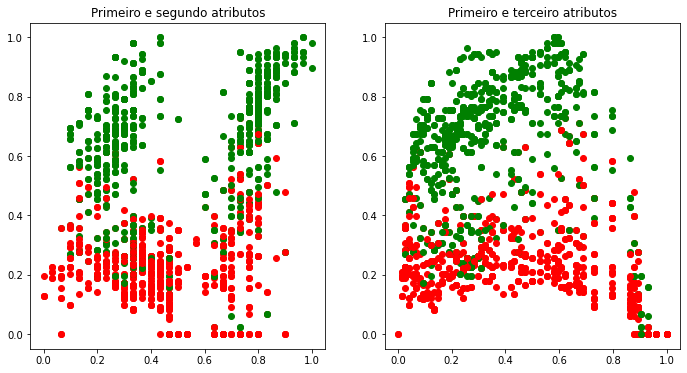

In [13]:
import matplotlib.pyplot as plt

#vamos visualizar o comportamento do conjunto de características:
plt.figure(figsize=(18, 6))
colors = ['red','green']

plt.subplot(1, 3, 1)
plt.title("Primeiro e segundo atributos")
for index, row in df_fixed_distance.iterrows():
    plt.scatter(row['DESIBELS'], row['AIRFLOW'], c=colors[y['STATUS'][index].astype(int)])

plt.subplot(1, 3, 2)
plt.title("Primeiro e terceiro atributos")
for index, row in df_fixed_distance.iterrows():
    plt.scatter(row['FREQUENCY'], row['AIRFLOW'], c=colors[y['STATUS'][index].astype(int)])

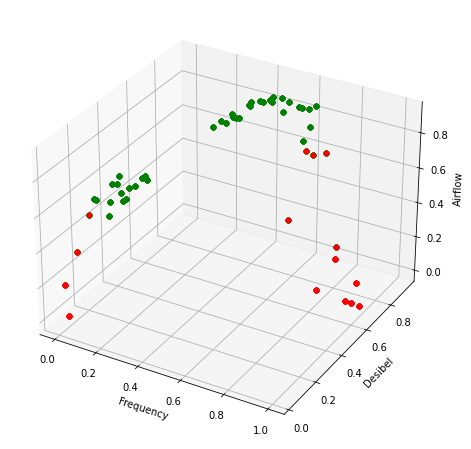

In [46]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(projection='3d')

for index, row in df_fixed_distance.iterrows():
    ax.scatter(row['FREQUENCY'], row['DESIBEL'], row['AIRFLOW'], c=colors[y['STATUS'][index].astype(int)])

ax.set_xlabel('Frequency')
ax.set_ylabel('Desibel')
ax.set_zlabel('Airflow')

plt.show()